**[Plotting Probabilities Using Matplotlib](https://livebook.manning.com/book/data-science-bookcamp/chapter-2/v-5/1)**

> datasbook01 <> sharklasers.com 123456

This section covers:
- Creating simple plots using Matplotlib.
- Labeling plotted data.
- What is a probability distribution?
- Plotting and comparing multiple probability distributions.

**Python Matplotlib library**, which is fully optimized for outputting high-caliber plots and data visualizations.In this section, we will leverage Matplotlib to better comprehend the coin-flip probabilities that we computed in Section One.

# Basic Matplotlib Plots

Install *Matplotlib* library on our virtual environment:
```
pip install matplotlib
```

Importing Matplotlib:

In [5]:
import matplotlib.pyplot as plt

Plotting a linear relationship:

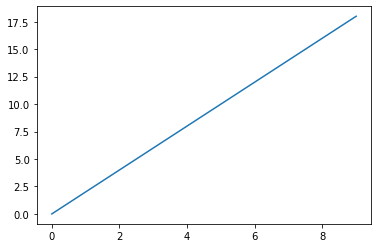

In [6]:
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

Plotting individual data-points:

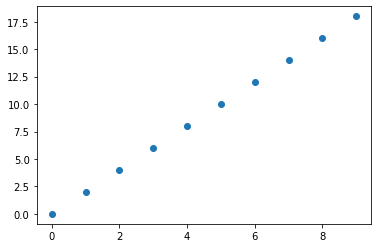

In [7]:
plt.scatter(x, y)
plt.show()

Shading an interval beneath a connected plot:

In [9]:
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

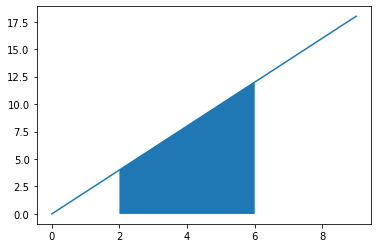

In [12]:
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

Exposing individual coordinates within a continuous plot. A connected plot and a scatter plot combined together with a shaded interval. The individual integers in the plot appear as points marking a smooth, indivisible line.

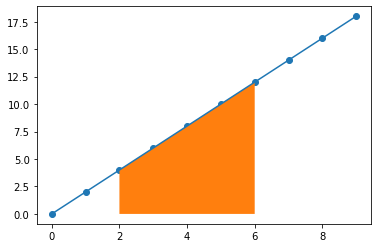

In [17]:
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

Furthermore, no data plot is ever truly complete without descriptive x-axis and y-axis labels. 

Adding axes labels:

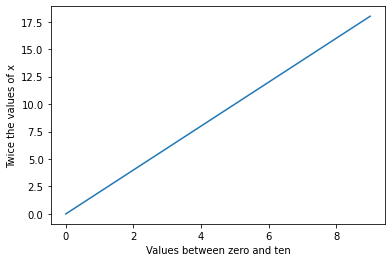

In [19]:
plt.plot(x, y)
plt.xlabel("Values between zero and ten")
plt.ylabel("Twice the values of x")
plt.show()

**Common Matplotlib method calls**

- `plt.plot(x, y)`: Plots the elements of `x` vs the elements of `y`. The plotted points are connected using smooth line segments.
- `plt.scatter(x, y)`: The plotted points are visualized individually, and are not connected by any lines.
- `plt.fill_between(x, y,  where=booleans)`: Highlights the area beneath a plotted curve. The curve is obtained by plotting `x` vs `y`. The `where` parameter defines the hightlighted interval. It takes a list of Booleans that correspond to elements of `x`. Each Boolean is `True` if its corresponding x-value is located within the highlighted interval.
- `plt.xlabel(label)`: Sets the x-label of the plotted curve to equal `label`.
- `plt.ylabel(label)`: Sets the y-label of the plotted curve to equal `label`.

# Plotting Coin-Flip Probabilities

In [32]:
from itertools import product
from collections import defaultdict

In [35]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(["Heads", "Tails"], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips if outcome == "Heads"])
        weighted_sample_space[heads_count] += 1

    return weighted_sample_space

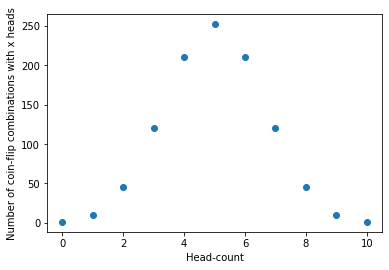

In [41]:
weighted_sample_space = generate_coin_sample_space()

x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]


plt.scatter(x_10_flips, y_10_flips)
plt.xlabel("Head-count")
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

Plotting the coin-flip probabilities.

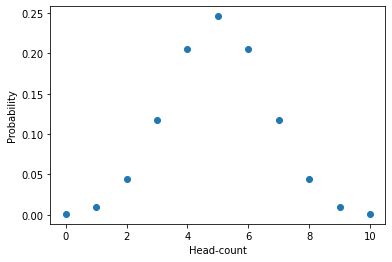

In [43]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

This mapping between x-values and probabilities is referred to as a **probability distribution**. Probability distributions exhibit certain mathematically consistent properties that make them useful for likelihood analysis. For instance, consider the x-values of any probability distribution. These correspond to all the possible values of some random variable r. The probability that r falls within some interval is equal to the area beneath the probability curve over the span of that interval. Therefore, the total area beneath a probability distribution always equals 1.0. This holds for any distribution, including our head-count plot. Let's confirm by executing `sum(prob_x_10_flips)`.

In [48]:
assert sum(prob_x_10_flips) == 1.0

Consequently, the area beneath the head-count interval of 8 through 10 is equal to the probability of observing 8 heads or more. We can visualize that area using the `plt.fill_between` method. 

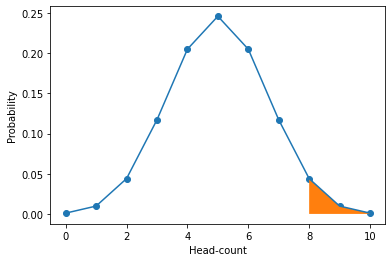

In [54]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

Now, let's also the shade the interval demarcating the probability of observing 8 tails or more. The code below will highlight the extremes along both tail-ends of our probability distribution.

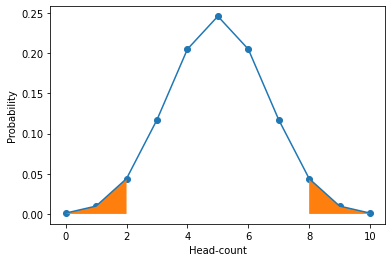

In [55]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

The two symmetrically shaded intervals cover the right and left tail-ends of the coin-flip curve. Based on our previous analysis, we know that the probability of observing more than 7 heads or tails is approximately 10%. Therefore, each of the symmetrically shaded tail segments should cover approximately 5% of the total area under the curve.

## Comparing Multiple Coin-Flip Probability Distributions

Let's extend our plot to also encompass the distribution for 20 flipped coins. We’ll plot both distributions on a single figure, though first we must compute the x-axis head-counts and y-axis probabilities for the 20 coin-flip distribution.

In [60]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size_20 = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size_20 for value in y_20_flips]

Now we are ready to visualize the two distributions simultaneously. We’ll do this by executing `plt.plot` and `plt.scatter` on both probability distributions. We will also pass a few style-related parameters into these method-calls.
- `color`: Determines the color of the plotted output. This setting can be a color name or a single-character code. Both `color=black` or `color=k` will generate a black plot. Both `color=red` or `color=r` will generate a red.
- `linestyle`: Determines the style of the plotted line that that connects the data-points. 
    - Its default value equals `-`. 
    - Inputting `linestyle='-'` will generate a connected line. 
    - Inputting `linestyle='--'` will generate a dashed line. 
    - Inputting `linestyle=':'` will generate a dotted line. 
    - Inputting `linestyle='.'` will generate a line composed of alternating dots and dashes.
- `marker`: Determines the style of markers assigned to individually-plotted points. 
    - Its default value equals `o`. Inputting `maker='o'` will generate a circular marker.
    - Inputting `maker='x'` will generate an x-shaped marker. 
    - Inputting `marker='s'` will generate a square-shaped marker. 
    - Inputting `marker='p'` will generate a pentagon-shaped marker.
- `label`: Maps a label to the specified color and style. This mapping will appear in the legend of the plot. A subsequent call to `plt.legend()` is required to make the legend visible.

Plotting 2 simultaneous distributions:

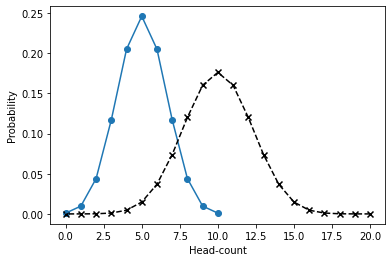

In [85]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)

plt.plot(x_20_flips, prob_x_20_flips, color="black", linestyle="--")
plt.scatter(x_20_flips, prob_x_20_flips, color="k", marker="x")

plt.xlabel("Head-count")
plt.ylabel("Probability")

plt.show()

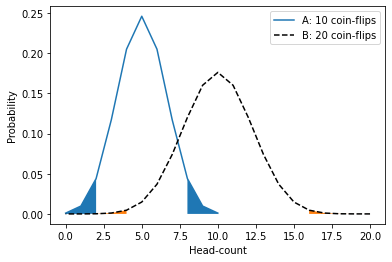

In [93]:
plt.plot(x_10_flips, prob_x_10_flips, label="A: 10 coin-flips")
plt.plot(
    x_20_flips, prob_x_20_flips, color="k", linestyle="--", label="B: 20 coin-flips"
)

plt.legend()

where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)

where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel("Head-count")
plt.ylabel("Probability")

plt.show()

Converting head-counts into frequencies:

In [ ]:
x_10_frequencies = [head_count / 10 for head_count in x_10_flips]
x_20_frequencies = [head_count / 20 for head_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_10_flips, label="A: 10 coin-flips")
plt.plot(
    x_20_frequencies,
    prob_x_20_flips,
    color="k",
    linestyle=":",
    label="B: 20 coin-flips",
)

plt.legend()

plt.xlabel("Head-Frequency")
plt.ylabel("Probability")
plt.show()

As expected, the two peaks now both align at the head-frequency of 0.5. However, our division by the head-counts has reduced the areas beneath the two curves by 10-fold and 20-fold, respectively. The total area beneath each curve no longer equals 1.0. This is a problem, because as we’ve discussed, the total area beneath a curve must sum to 1.0 if we wish infer a probability from its shaded intervals. Thus, we’ll need to force the aligned curve-areas to equal 1.0 prior to doing interval comparison. To do this, we’ll simply multiply the y-axis values of curves A and B by 10 and 20. The adjusted y-values will no longer refer to probabilities, so we’ll have to name them something else. The appropriate term to use is **relative likelihood**, which mathematically refers to a y-axis value within a curve whose total area is 1.0. We’ll therefore name our new y-axis variables `relative_likelihood_10` and `relative_likelihood_20`.

omputing relative likelihoods of frequencies:

In [102]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

The conversion is complete. Its time to plot our two new curves, while also highlighting the intervals associated with our `where_10` and `where_20` Boolean arrays.

Plotting aligned relative likelihood curves:

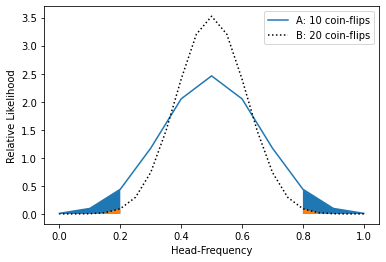

In [104]:
plt.plot(x_10_frequencies, relative_likelihood_10, label="A: 10 coin-flips")
plt.plot(
    x_20_frequencies,
    relative_likelihood_20,
    color="k",
    linestyle=":",
    label="B: 20 coin-flips",
)

plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.legend()
plt.xlabel("Head-Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

Hypothetical head-count frequencies plotted over an increasing number of coin-flips. All y-axis peaks align at a frequency of 0.5. The peaks grow higher and more narrow as the coin-flip count goes up. At 2000 coin-flips, the constricted area of the peak is centered almost entirely at 0.5. With infinite coin-flips, the resulting peak should stretch into a single, vertical line that’s perfectly positioned at 0.5.

![](https://drek4537l1klr.cloudfront.net/apeltsin/v-5/Figures/fig2-14.png)

The relationship between infinite coin flips and absolute certainty is guaranteed by a fundamental theorem in probability theory: **the Law of Large Numbers**. According to that law, the frequency of an observation becomes virtually indistinguishable from the probability of that observation when the number of observations grows high. Therefore, with enough coin-flips, our frequency of heads will equal the actual probability of heads, which is 0.5. Beyond mere coin-flips; we can apply the law to more complex phenomena, such as card games. If we run enough card game simulations, then our frequency of a win will equal the actual probability of a win.

In the subsequent section, we will show how the Law of Large numbers can be combined with random simulations to approximate complex probabilities. Eventually, we will execute simulations to find the probabilities of randomly drawn cards. However, as the Law of "Large" numbers indicates, these simulations must be run on a large, computationally expensive scale. Therefore, efficient simulation implementation will require us to familiarize ourselves with the NumPy numeric computation library. That library will be discussed in Section Three.

# Summary

- By plotting every possible numeric observation vs its probability, we generate a probability distribution. The total area beneath a probability distribution sums to 1. The area beneath a specific interval of the distribution equals the probability of observing some value within that interval.
- The y-axis values of a probability distribution do not necessarily need to equal probabilities, as long as the plotted area sums to 1.
- The probability distribution of a fair coin-flip sequence resembles a symmetric curve. Its x-axis head-counts can be converted into frequencies. During that conversion, we can maintain an area of 1 by converting y-axis probabilities into relative likelihoods. The peak of the converted curve is centered at a frequency of 0.5. If the coin-flip count is raised, then the peak will also rise as the curve becomes more narrow on its sides.
- According to the Law of Large Numbers, the frequency of any observation will approach the probability of that observation as the observation-count grows large. Thus, a fair-coin distribution becomes dominated by its central frequency of 0.5 as the coin-flip count goes up.